** Predict the survival of passengers in Titanic **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titen_data = pd.read_csv("train.csv")

In [3]:
titen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titen_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titen_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

** There is no need of columns like Cabin, embarked, fare **

In [7]:
titen_data = titen_data.drop('Cabin', axis = 1)

In [8]:
titen_data = titen_data.drop('Embarked',1)

In [9]:
titen_data = titen_data.drop('Fare', 1)

In [10]:
titen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450


In [11]:
titen_data['Age'] = titen_data['Age'].fillna(titen_data['Age'].mean())

In [12]:
titen_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


** we will divide age into 4 like children, young, mid, and old. so, that from that we can predict the probability of survival according to these 4 categories. **

In [13]:
titen_data.loc[titen_data['Age']<=16, 'Age'] = 0
titen_data.loc[(titen_data['Age']>16) & (titen_data['Age']<=32), 'Age'] = 1
titen_data.loc[(titen_data['Age']>32) & (titen_data['Age']<=48), 'Age'] = 2
titen_data.loc[(titen_data['Age']>48) & (titen_data['Age']<=64), 'Age'] = 3
titen_data.loc[(titen_data['Age']>64), 'Age'] = 4

In [14]:
titen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450


In [15]:
a = pd.crosstab(titen_data['Age'],titen_data['Survived'])
a

Survived,0,1
Age,,
0.0,45,55
1.0,343,180
2.0,112,76
3.0,39,30
4.0,10,1


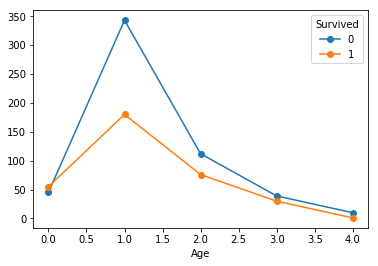

In [16]:
a.plot(marker='o')

In [17]:
titen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450


In [119]:
def get_title(name):
    if ',' in name:
        title = name.split(',')[1].split('.')[0].strip()
        return title
    else:
        return 'unknown'
    
def title_map(title):
    if title in ['Mr']:
        return 'Mr'
    elif title in ['Master']:
        return 'Master'
    elif title in ['Ms','Mlle','Miss']:
        return 'Miss'
    elif title in ['Mme','Mrs']:
        return 'Mrs'
    else:
        return 'unknown'

titen_data['Title'] = titen_data['Name'].apply(get_title).apply(title_map)

In [120]:
titen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,Mr


** Getting abrrivations from name and then dividing into 4 groups such as mr, mrs, miss, master. **

In [121]:
title_cross = pd.crosstab(titen_data['Title'], titen_data['Survived'])
title_cross

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
unknown,15,8


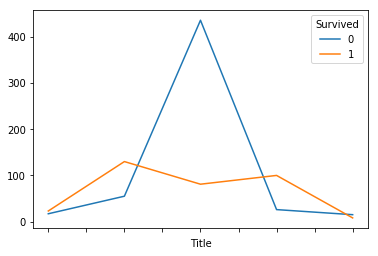

In [122]:
title_cross.plot()

In [83]:
titen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,5
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,5
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1


In [19]:
titen_data = titen_data.drop('Ticket',1)

In [20]:
titen_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Family_info
0,1,0,3,male,1.0,1
1,2,1,1,female,2.0,1
2,3,1,3,female,1.0,0
3,4,1,1,female,2.0,1
4,5,0,3,male,2.0,0


** Deciding that person is traveling alone or with family. By adding columns parch and sibsp if addition is greater than 1 then person is travelling with family else alone **

In [15]:
titen_data['Family_info'] = titen_data['SibSp']+titen_data['Parch']
titen_data.loc[titen_data['Family_info'] >0, 'Family_info'] = 1
titen_data.loc[titen_data['Family_info'] == 0, 'Family_info'] = 0

In [16]:
titen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Family_info
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,1
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,1
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,0


In [88]:
pd.crosstab(titen_data['Family_info'], titen_data['Survived'])

Survived,0,1
Family_info,,
0,374,163
1,175,179


In [89]:
pd.crosstab(titen_data['Sex'], titen_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [21]:
titen_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Family_info
0,1,0,3,male,1.0,1
1,2,1,1,female,2.0,1
2,3,1,3,female,1.0,0
3,4,1,1,female,2.0,1
4,5,0,3,male,2.0,0


In [17]:
titen_data = titen_data.drop(['Name', 'SibSp', 'Parch'], 1)

In [22]:
# titen_data = titen_data.drop('Ticket',1)
titen_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Family_info
0,1,0,3,male,1.0,1
1,2,1,1,female,2.0,1
2,3,1,3,female,1.0,0
3,4,1,1,female,2.0,1
4,5,0,3,male,2.0,0


** Now we need to predict who will be survived from this **

for machine learning we want every column in number, so we will convert Sex column into number as 0 for female and 1 for male.

In [33]:
titen_data['Sex'] = np.where(titen_data['Sex']=='female',0,1)

In [34]:
titen_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Family_info
0,1,0,3,1,1.0,1
1,2,1,1,0,2.0,1
2,3,1,3,0,1.0,0
3,4,1,1,0,2.0,1
4,5,0,3,1,2.0,0


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
pd.options.mode.chained_assignment = None   # just for switching off pandas warning
from sklearn.externals import joblib

/home/priyankat/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
input_data = titen_data[['PassengerId', 'Pclass', 'Sex', 'Age']]
expected_output = titen_data[['Survived']]

In [43]:
input_train, input_test, expected_op_train, expected_op_test = train_test_split(input_data, expected_output, test_size=0.33, random_state=42)

In [44]:
input_train.describe()

,PassengerId,Pclass,Sex,Age
count,596.000000,596.000000,596.000000,596.000000
mean,448.508389,2.337248,0.654362,1.273490
std,259.457226,0.823207,0.475975,0.799602
min,1.000000,1.000000,0.000000,0.000000
25%,221.750000,2.000000,0.000000,1.000000
50%,459.500000,3.000000,1.000000,1.000000
75%,676.250000,3.000000,1.000000,2.000000
max,891.000000,3.000000,1.000000,4.000000


In [45]:
input_test.describe()

,PassengerId,Pclass,Sex,Age
count,295.000000,295.000000,295.000000,295.000000
mean,440.932203,2.250847,0.633898,1.325424
std,253.412241,0.859990,0.482556,0.838608
min,3.000000,1.000000,0.000000,0.000000
25%,234.000000,1.000000,0.000000,1.000000
50%,429.000000,3.000000,1.000000,1.000000
75%,653.500000,3.000000,1.000000,2.000000
max,890.000000,3.000000,1.000000,4.000000


In [46]:
rf = RandomForestClassifier(n_estimators=100)

In [47]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
rf.fit(input_train, expected_op_train)

/home/priyankat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
accuracy = rf.score(input_train, expected_op_train)

In [50]:
accuracy

1.0

In [51]:
print("accuracy = {}%".format(accuracy*100))

accuracy = 100.0%


In [99]:
pred = rf.predict(input_data)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [113]:
#This will give you accuracy of our algoritham over actual accuracy.

titen_survived = np.loadtxt('survived.txt', dtype='int32')
diff_arr = np.equal('survived.txt',pred)
correct_ans = np.sum(diff_arr)
# percent_diff = correct_ans/len(pred)*100         

/home/priyankat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [52]:
joblib.dump(rf, 'titen_machinelerning_result',compress=9)

['titen_machinelerning_result']

In [53]:
joblib.dump(rf, "titanic_model1", compress=9)

['titanic_model1']

In [54]:
joblib.load('titanic_model1')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

** Just for Timepass and checking how it works.... **

In [55]:
titen_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Family_info
0,1,0,3,1,1.0,1
1,2,1,1,0,2.0,1
2,3,1,3,0,1.0,0
3,4,1,1,0,2.0,1
4,5,0,3,1,2.0,0


In [56]:
check_ip_data = titen_data[['PassengerId','Pclass', 'Sex']]

In [57]:
check_op_data = titen_data[['Survived']]

In [58]:
check_ip_train, check_ip_test, check_op_train, check_op_test = train_test_split(check_ip_data, check_op_data, test_size=0.33, random_state = 42)

In [59]:
check_ip_train.head()

,PassengerId,Pclass,Sex
6,7,1,1
718,719,3,1
685,686,2,1
73,74,3,1
882,883,3,0


In [60]:
check_op_train.head()

,Survived
6,0
718,0
685,0
73,0
882,0


In [61]:
rf1 = RandomForestClassifier(n_estimators=100)

In [62]:
rf1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rf2 = RandomForestClassifier(n_estimators=50)

In [64]:
rf2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
rf1.fit(check_ip_train, check_op_train)

/home/priyankat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
accuracy1 = rf1.score(check_ip_train, check_op_train)

In [67]:
accuracy1*100

100.0

In [68]:
rf2.fit(check_ip_train,check_op_train)

/home/priyankat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
accuracy2 = rf2.score(check_ip_train,check_op_train)

In [70]:
accuracy2*100

99.83221476510067

In [71]:
joblib.dump(rf1, 'check')

['check']

In [72]:
check1_ip_data = titen_data[['PassengerId', 'Sex']]

In [73]:
check1_op_data = titen_data[['Survived']]

In [79]:
check1_ip_train, check1_ip_test, check1_op_train, check1_op_test = train_test_split(check1_ip_data, check1_op_data, test_size=0.33, random_state = 42)

In [80]:
check1_op_train.head()

,Survived
6,0
718,0
685,0
73,0
882,0


In [81]:
rf3 = RandomForestClassifier(n_estimators = 100)

In [82]:
rf3.fit(check1_ip_train, check1_op_train)

/home/priyankat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
accuracy4 = rf3.score(check1_ip_train, check1_op_train)

In [86]:
accuracy4*100

99.83221476510067

In [87]:
c = joblib.load('titanic_model1')

In [88]:
c

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
data2 = titen_data[['PassengerId', 'Sex']]
c = joblib.load('titanic_model1')
pred = c.predict(titen_data)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 6 